# Credit Card Fraud Detection  

## Group 12

In [1]:
#Libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec # to do the grid of plots

###  Loading Data 

In [2]:

# reading data from csv file
df = pd.read_csv('creditcard.csv')

In [3]:
# prinitng 1st 5 rows with headings  
data_top = df.head()
data_top.to_csv("data_head.csv")
df.head(10)
#There are no null values in the dataset.

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


## Salient Features of data:  
Total 31 attributes (including class)  
Time is a Discrete-valued numeric attribute.  
V1 to V28 are Principal Components of the orginial dataset not avaliable to us.  
They are a result of Principal Component Analysis.   
They are continuous valued numeric attributes. We cannot say whether they are ratio-scaled or interval-scaled   
Amount is a continuous-valued numeric attribute.  
Class is a discrete-valued Binary attribute that takes value 0 for non-fraudulent transaction and 1 for fraud transaction.  
V1 to V28 are distributed aroud 0 and are scaled.  
From V1 to V28, the variance of attributes decreases from left to right, as expected from a PCA output.  

In [4]:
# prinitng 5 number summary, basic info about the data
data_summary = df.describe()
data_summary.to_csv("data_summary.csv")
df.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Checking on Amount and Time Data

In [3]:

df[['Time', 'Amount']].describe()
# Time and Amount are not scaled.

,Time,Amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


# Visualizing Data Distribution

Non Fraudulent:  99.827 % of the dataset
Fraudulent:  0.173 % of the dataset


C:\Users\glaedur\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


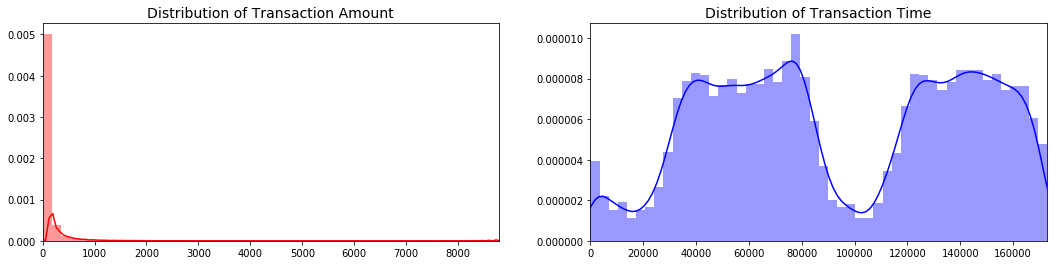

In [23]:
# Time and Amount Distribution

print('Non Fraudulent: ', round(df['Class'].value_counts()[0]/len(df) * 100,3), '% of the dataset')
print('Fraudulent: ', round(df['Class'].value_counts()[1]/len(df) * 100,3), '% of the dataset')

# colors = ["#0101DF", "#DF0101"]
# sns.countplot('Class', data=df, palette=colors)
# plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
# plt.show()

fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])
# for i =1:30:

plt.show()

### distribution of amount with Class:

Text(0.5,0,'Class (0:Non-Fraudulent, 1:Fraudulent)')

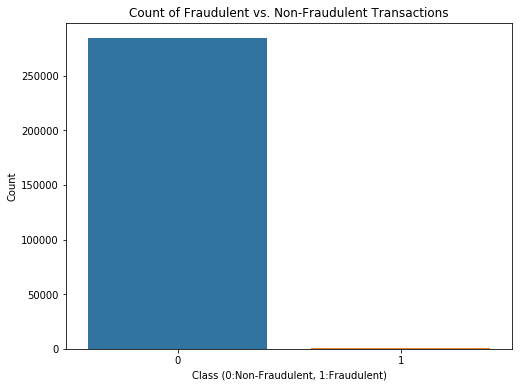

In [7]:
counts = df.Class.value_counts()
normal = counts[0]
fraudulent = counts[1]
plt.figure(figsize=(8,6))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

Text(0,0.5,'Amount')

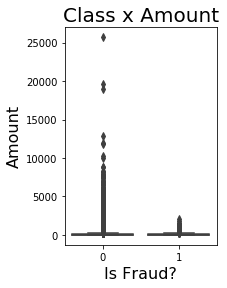

In [8]:
# Class - Amount Plot
plt.subplot(121)
ax = sns.boxplot(x ="Class",y="Amount",
                 data=df)
ax.set_title("Class x Amount", fontsize=20)
ax.set_xlabel("Is Fraud?", fontsize=16)
ax.set_ylabel("Amount", fontsize = 16)
# Total Data Objects with Class 0: 2,84,315 (99.83%) - non-fraud transactions
# Total Data Objects with Class 1: 492 (0.17%) - fraud transactions
#Therefore, the dataset has a strong imbalanced nature, where the problem is two-class classification.

There are __only 7__ points out of 2.8 Lakh having Amount > 10,000.  
Therefore these values should be excluded from dataset.

In [4]:
df[df.Amount > 10000]


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
46841,42951.0,-23.712839,-42.172688,-13.320825,9.925019,-13.945538,5.564891,15.710644,-2.844253,-1.580725,...,7.921600,-6.320710,-11.310338,0.404175,-4.547278,-1.577118,-2.357385,2.253662,12910.93,0
54018,46253.0,-21.780665,-38.305310,-12.122469,9.752791,-12.880794,4.256017,14.785051,-2.818253,-0.667338,...,7.437478,-5.619439,-10.547038,0.653249,-4.232409,-0.480459,-2.257913,2.082488,11898.09,0
58465,48401.0,-36.802320,-63.344698,-20.645794,16.715537,-20.672064,7.694002,24.956587,-4.730111,-2.687312,...,11.455313,-10.933144,-17.173665,1.180700,-7.025783,-2.534330,-3.602479,3.450224,19656.53,0
151296,95286.0,-34.549296,-60.464618,-21.340854,16.875344,-19.229075,6.335259,24.422716,-4.964566,0.188912,...,11.502580,-9.499423,-16.513186,0.744341,-7.081325,-2.604551,-3.550963,3.250802,18910.00,0
169457,119713.0,-20.924897,-37.943452,-14.060281,10.473005,-10.866639,6.256654,14.960521,-2.392155,-0.597076,...,6.829810,-6.926353,-9.928657,-0.447084,-4.848151,-2.241620,-2.140723,2.001492,11789.84,0
274771,166198.0,-35.548539,-31.850484,-48.325589,15.304184,-113.743307,73.301626,120.589494,-27.347360,-3.872425,...,-21.620120,5.712303,-1.581098,4.584549,4.554683,3.415636,31.612198,-15.430084,25691.16,0
284249,172273.0,-9.030538,-11.112584,-16.233798,3.592021,-40.427726,23.917837,44.054461,-7.277778,-4.210637,...,-0.269048,0.988144,7.040028,0.347693,2.520869,2.342495,3.478175,-2.713136,10199.44,0


In [5]:
df = df[df.Amount < 10000]
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,...,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000
mean,94813.586235,0.000716,0.001123,0.000542,-0.000326,0.000800,-0.000436,-0.000897,0.000198,0.000045,...,-0.000100,0.000140,0.000326,-0.000027,0.000103,0.000019,-0.000073,0.000008,87.927043,0.001728
std,47488.019368,1.953489,1.635632,1.511555,1.414375,1.359939,1.324170,1.210706,1.193066,1.098578,...,0.732325,0.724703,0.618721,0.605586,0.520394,0.482084,0.399034,0.328549,235.414278,0.041528
min,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-8.887017,-44.807735,-2.836627,-10.295397,-2.068561,-22.565679,-11.710896,0.000000,0.000000
25%,54202.500000,-0.920290,-0.598457,-0.890240,-0.848660,-0.691546,-0.768299,-0.554089,-0.208605,-0.643083,...,-0.228395,-0.542320,-0.161841,-0.354593,-0.317128,-0.326979,-0.070835,-0.052960,5.590000,0.000000
50%,84691.000000,0.018158,0.065524,0.179859,-0.019921,-0.054322,-0.274227,0.040079,0.022363,-0.051416,...,-0.029452,0.006795,-0.011191,0.040964,0.016607,-0.052124,0.001343,0.011243,22.000000,0.000000
75%,139320.000000,1.315648,0.803743,1.027212,0.743302,0.611927,0.398463,0.570385,0.327356,0.597164,...,0.186367,0.528554,0.147642,0.439524,0.350716,0.240952,0.091045,0.078277,77.150000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.491217,34.801666,22.529298,36.877368,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.022866,7.519589,3.517346,12.152401,33.847808,8790.260000,1.000000


Text(0,0.5,'Amount')

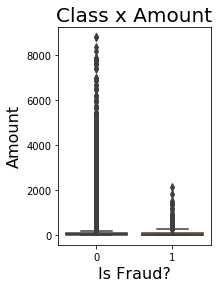

In [11]:
#New distribution of amount with Class:
plt.subplot(121)
ax = sns.boxplot(x ="Class",y="Amount",
                 data=df)
ax.set_title("Class x Amount", fontsize=20)
ax.set_xlabel("Is Fraud?", fontsize=16)
ax.set_ylabel("Amount", fontsize = 16)

### Creating new columns for ease in visualization

In [5]:

data_new = df
timedelta = pd.to_timedelta(data_new['Time'], unit='s')
#new variable for further analysis
data_new['Time_min'] = (timedelta.dt.components.minutes).astype(int)
#new variable for further analysis
data_new['Time_hour'] = (timedelta.dt.components.hours).astype(int)


### Looking at the Amount and time distribuition of FRAUD transactions

Text(0.5,1,'Amounts by Minutes of Frauds and Normal Transactions')

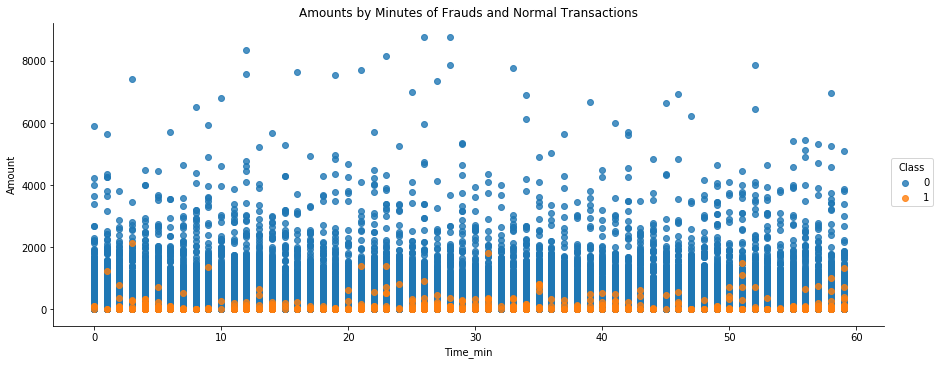

In [13]:

ax = sns.lmplot(y="Amount", x="Time_min", fit_reg=False, aspect=2.5, data=data_new, hue='Class')
plt.title("Amounts by Minutes of Frauds and Normal Transactions",fontsize=12)
#plt.savefig('Amount_VS_Time_Scatter.png')

### Exploring the distribuition by Class types throught hours

Tried to get an idea of trend by hours in order to identify if at certains hours transcations peak, hinting at a higher probability of fraudulent transaction

C:\Users\glaedur\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(-1, 25)

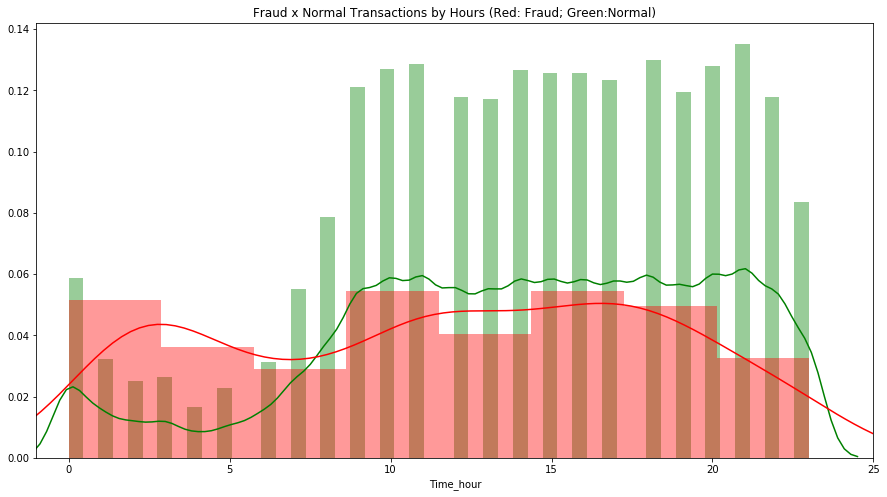

In [14]:

plt.figure(figsize=(15,8))
# Non-Fraudulent Transactions over Time (in hr) - GREEN
sns.distplot(data_new[data_new['Class'] == 0]["Time_hour"],
             color='g')
# Fraudulent Transactions over time (in hr) - RED
sns.distplot(data_new[data_new['Class'] == 1]["Time_hour"],
             color='r')
plt.title('Fraud x Normal Transactions by Hours (Red: Fraud; Green:Normal)', fontsize=12)
plt.xlim([-1,25])
#plt.savefig('Time_distribution_fraud_NonFraud.png')

### distribution of each class for syntethic variables between V1-V28

If peaks of both classes occur at different peaks, we can decide on a threshold for that attribute - less data points so bias should be high.

C:\Users\glaedur\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


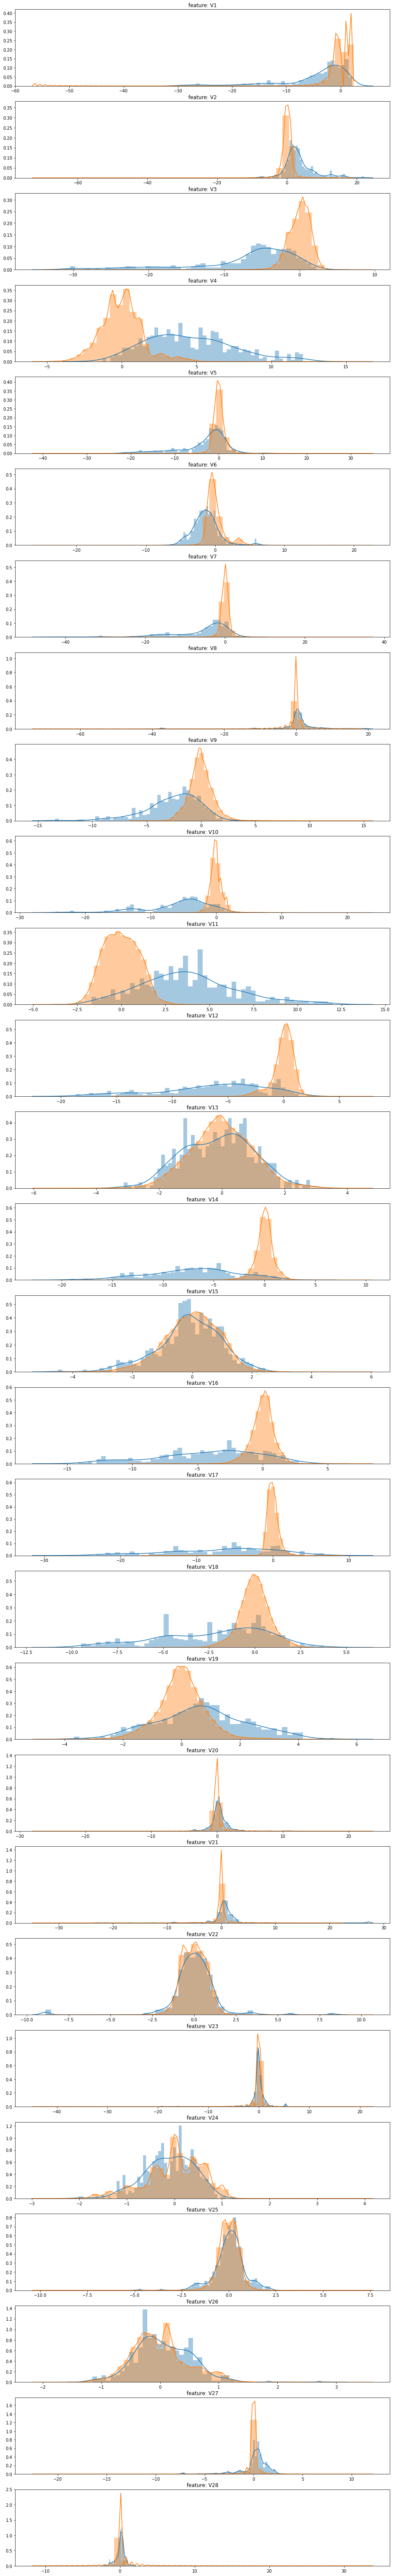

In [15]:


plt.figure(figsize=(16,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(data_new[data_new.iloc[:, 1:29].columns]):
    ax = plt.subplot(gs[i])
    sns.distplot(data_new[cn][data_new.Class == 1], bins=50)
    sns.distplot(data_new[cn][data_new.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('feature: ' + str(cn))
#plt.savefig('Attribute_Distribution_with Class_Seperation.png')

Which features follow normal distribution , only V14 so we couldn't use properties of Normal distribution -Kush

C:\Users\glaedur\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


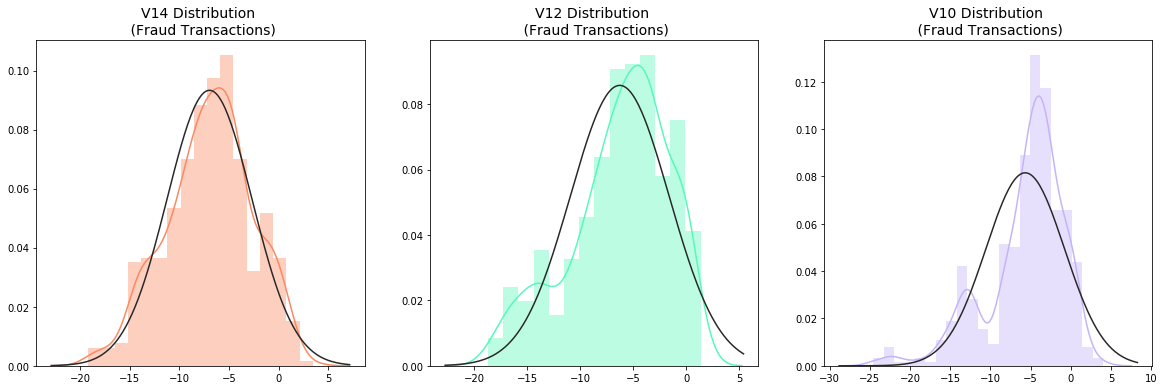

In [17]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

v14_fraud_dist = df['V14'].loc[df['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = df['V12'].loc[df['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)


v10_fraud_dist = df['V10'].loc[df['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

As there is __no nominal attribute__, we don't use bar graphs for analysis.   
__NO__ data cubing performed, as attributes have no hierarchy, and are continuous  
Scatter plot of all attributes Pairwise (Pair Plots)  

In [ ]:
# sns.set(style="ticks")
# sns.pairplot(df, hue="Class")
#plt.savefig('pairplots_coloured')
# Observation: Fraudulent cases are concentrated near 0 in attribute V20, V27, V28 and Amount.

### Box plots

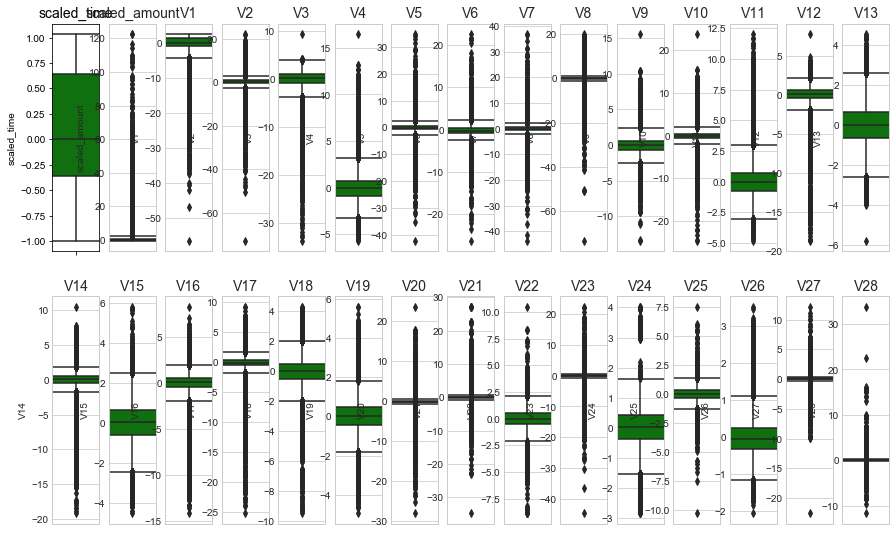

In [37]:
l = df.columns.values 
number_of_columns= 15
number_of_rows = len(l)-1/number_of_columns #one column is of class so we won't take it for the corelation analysis
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)-1):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df[l[i]],color='green',orient='v',width=20).set_title(l[i],fontsize=14)
#     plt.tight_layout()

Deciding on threshold + detecting corrrelation which made us plot correlation heat map

### Correlation matrix heat-map

Most of the pixels are dark pink in colour, which means most of attributes are independent of each other.  
Some cases are of positive correlation and some are negatively correlated.  
But Pearson’s product coefficient of all lies between (-0.5 to +0.5). Hence, we are not removing any attribute in this step.  
Negative correlation with class: V10, V12, V14, V17  
__We have to make sure we use the subsample in our correlation matrix or else our correlation matrix will be affected by the high imbalance between our classes. This occurs due to the high class imbalance in the original dataframe.__

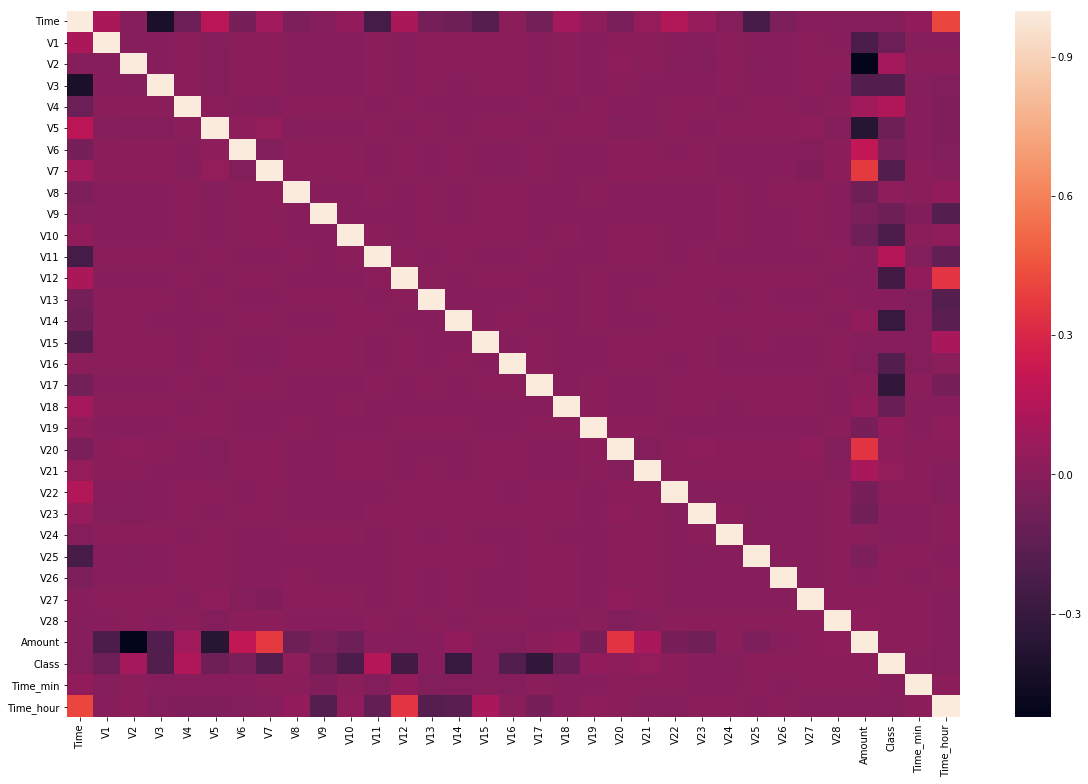

In [25]:

plt.subplots(figsize=(20,13 ))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False)
#plt.savefig('corelation_matrix_heatmap.png')


### Checking Missing Values

In [27]:

print('Are there any Missing values? : ',df.isnull().any().any())

Are there any Missing values? :  False


###  Data Consistency

Data outliers are indicative fraud transactions - so explicit data smoothing not performed.   
Extreme outliers will be removed while training the model.
We also plan to remove outliers during training the model via a new technique.

Resolving Inconsistencies:  
As V1 to V28 are Principal Components, they don't have any inconsistencies.  


### Scaling Data using Robust Scalar

In [6]:
# Reason: robust scaler is immune to outliers, as median is chosen as the central tendancy.
from sklearn.preprocessing import StandardScaler, RobustScaler

rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)
df = df[['scaled_time','scaled_amount', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
       'Class']]
df.to_csv("scaled_data.csv")
print('Scaled Data\n')
df.head(10)

Scaled Data



,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.994989,1.783399,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.994989,-0.269843,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-0.994978,4.984069,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.994978,1.418390,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.994966,0.670626,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0
5,-0.994966,-0.256149,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,...,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,0
6,-0.994942,-0.237703,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,...,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,0
7,-0.994907,0.262717,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,...,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0
8,-0.994907,0.994969,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,...,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0
9,-0.994884,-0.256009,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,...,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,0


### Splitting Data 

In [7]:

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold


# print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
# print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    # print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels
original_Xtrain.to_csv("X_train.csv")
original_ytrain.to_csv("y_train.csv")
original_Xtest.to_csv("X_test.csv")
original_ytest.to_csv("y_test.csv")

# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))


/Users/nimishagarwal/anaconda3/envs/Data-Science-with-Python/lib/python3.6/site-packages/ipykernel_launcher.py:24: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.


----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827072 0.00172928]
[0.99827946 0.00172054]


/Users/nimishagarwal/anaconda3/envs/Data-Science-with-Python/lib/python3.6/site-packages/ipykernel_launcher.py:26: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.


### Reducing Rows via Random-Under Sampling: Numerosity Reduction:  

Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.  

Lets shuffle the data before creating the subsamples  

Cosine Similarity Analysis not performed as data has very few zeros.  
Parametric Methods for numerosity reduction- NOT Applicable as we need to detect outliers  

In [7]:


df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)
new_df.to_csv('new_data.csv')
new_df.head()

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
240148,0.772544,-0.288010,-0.175745,1.085251,-1.095319,-0.829231,1.037689,0.073366,0.489721,0.471723,...,-0.098826,0.374164,1.126284,-0.192880,-0.390276,-0.647457,-0.198610,0.371321,0.244094,0
6899,-0.890686,-0.293460,-2.661802,5.856393,-7.653616,6.379742,-0.060712,-3.131550,-3.103570,1.778492,...,0.399097,0.734775,-0.435901,-0.384766,-0.286016,1.007934,0.413196,0.280284,0.303937,1
242555,0.785420,0.251537,-0.961138,0.817043,-0.181713,-0.908427,0.600183,-0.769392,0.710854,0.437037,...,0.061704,0.001172,-0.303796,0.002430,0.721613,-0.095276,-0.150134,0.183090,0.086975,0
6820,-0.893788,-0.293460,-2.169929,3.639654,-4.508498,2.730668,-2.122693,-2.341017,-4.235253,1.703538,...,0.500779,0.645103,-0.503529,-0.000523,0.071696,0.092007,0.308498,0.552591,0.298954,1
154697,0.210697,-0.201369,-4.221221,2.871121,-5.888716,6.890952,-3.404894,-1.154394,-7.739928,2.851363,...,-0.227882,1.620591,1.567947,-0.578007,-0.059045,-1.829169,-0.072429,0.136734,-0.599848,1


## Further Analysis and Preprocessing of new Balanced Data Frame

Distribution of the Classes in the subsample dataset
1    0.5
0    0.5
Name: Class, dtype: float64


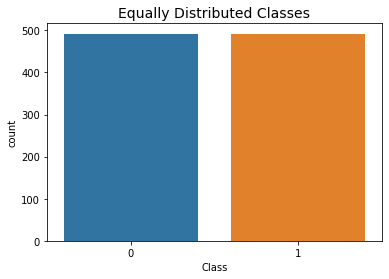

In [9]:

print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))

sns.countplot('Class', data=new_df)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

Now with this Balanced Dataset, we can apply more Supervised Learning Algorithms which was a short-coming on previous dataset (due to high class imbalance).

New Boxplot

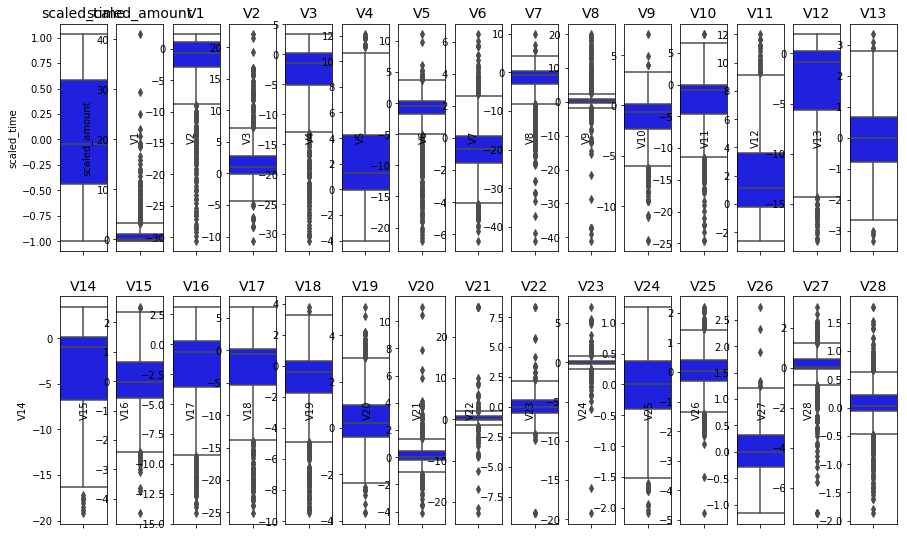

In [33]:

l = new_df.columns.values 
number_of_columns= 15
number_of_rows = len(l)-1/number_of_columns #one column is of class so we won't take it for the corelation analysis
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)-1):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    #sns.set_style('whitegrid')
    sns.boxplot(new_df[l[i]],color='blue',orient='v',width=20).set_title(l[i],fontsize=14)
#     plt.tight_layout()

#plt.savefig('boxplots_new.png')

### Correlation matrix heat-map on new Balanced Data

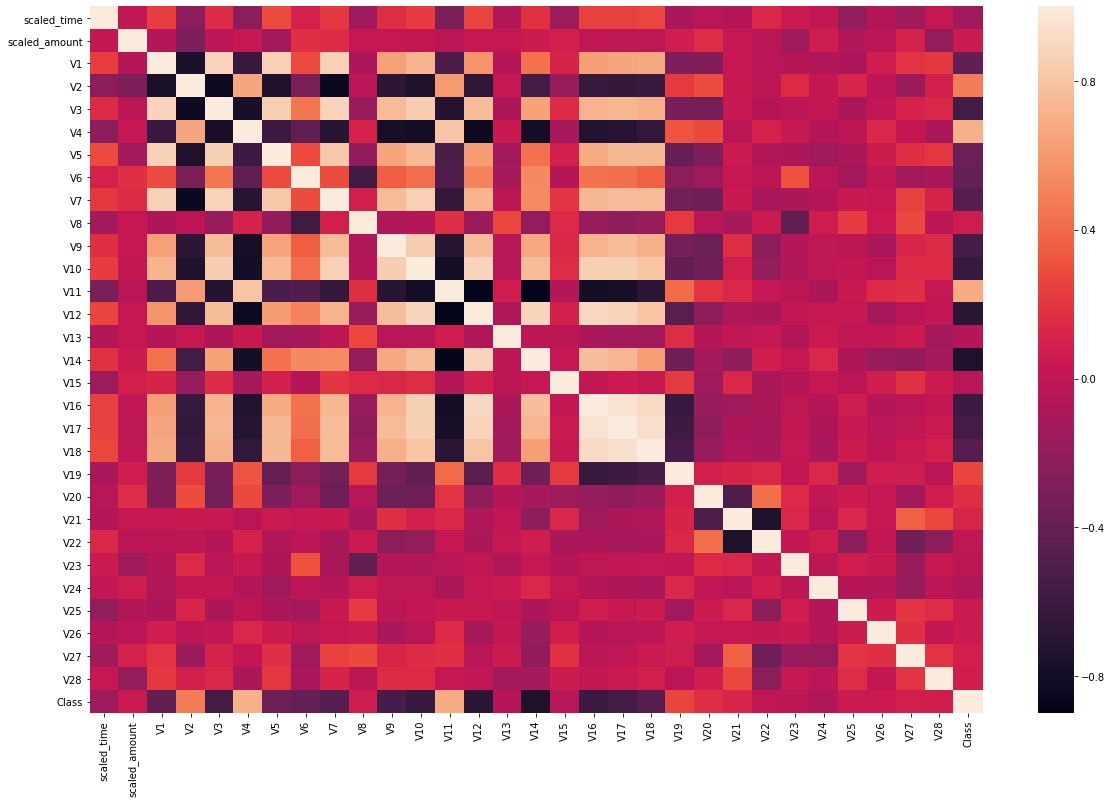

In [9]:


plt.subplots(figsize=(20,13 ))
correlation_matrix = new_df.corr()
sns.heatmap(correlation_matrix, annot=False)
#plt.savefig('corelation_matrix_heatmap_new.png')

In [10]:
l = new_df.columns.values
for i in range(31):
    for j in range(i):
        if(abs(correlation_matrix.iloc[i,j])>0.9 and i != j):
            print(l[i],l[j])

V16 V12
V17 V16
V18 V16
V18 V17


### Note: _We are not dropping any of the correlated columns because after performing classification, we found that the accuracy of our model decreases incase of dropping the columns_.

In [38]:
# new_df = new_df.drop(['V12', 'V17', 'V18'], axis = 1)

In [8]:
new_df.head()

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
240148,0.772544,-0.288010,-0.175745,1.085251,-1.095319,-0.829231,1.037689,0.073366,0.489721,0.471723,...,-0.098826,0.374164,1.126284,-0.192880,-0.390276,-0.647457,-0.198610,0.371321,0.244094,0
6899,-0.890686,-0.293460,-2.661802,5.856393,-7.653616,6.379742,-0.060712,-3.131550,-3.103570,1.778492,...,0.399097,0.734775,-0.435901,-0.384766,-0.286016,1.007934,0.413196,0.280284,0.303937,1
242555,0.785420,0.251537,-0.961138,0.817043,-0.181713,-0.908427,0.600183,-0.769392,0.710854,0.437037,...,0.061704,0.001172,-0.303796,0.002430,0.721613,-0.095276,-0.150134,0.183090,0.086975,0
6820,-0.893788,-0.293460,-2.169929,3.639654,-4.508498,2.730668,-2.122693,-2.341017,-4.235253,1.703538,...,0.500779,0.645103,-0.503529,-0.000523,0.071696,0.092007,0.308498,0.552591,0.298954,1
154697,0.210697,-0.201369,-4.221221,2.871121,-5.888716,6.890952,-3.404894,-1.154394,-7.739928,2.851363,...,-0.227882,1.620591,1.567947,-0.578007,-0.059045,-1.829169,-0.072429,0.136734,-0.599848,1


In [9]:
new_df.describe()

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,...,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,0.040299,1.120870,-2.381815,1.830674,-3.495285,2.351519,-1.570948,-0.717049,-2.804548,0.285404,...,0.158662,0.357416,0.021744,-0.020443,-0.055509,-0.006100,0.034398,0.083105,0.046239,0.500000
std,0.560551,3.065519,5.502836,3.667984,6.229718,3.141147,4.207282,1.736992,5.838618,4.885959,...,1.063989,2.792716,1.165555,1.164721,0.559515,0.687042,0.484183,1.014024,0.420905,0.500254
min,-0.994825,-0.307434,-30.552380,-13.536985,-31.103685,-3.587216,-22.105532,-8.280604,-43.557242,-41.044261,...,-4.128186,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.291936,-7.263482,-1.869290,0.000000
25%,-0.443787,-0.289407,-2.837530,-0.097546,-5.120349,0.088578,-1.779872,-1.606496,-3.105154,-0.210654,...,-0.202098,-0.164845,-0.521657,-0.256809,-0.406367,-0.367185,-0.274483,-0.060597,-0.056316,0.000000
50%,-0.031868,-0.036962,-0.772478,0.976944,-1.338530,1.411577,-0.412719,-0.639502,-0.646327,0.148887,...,0.009795,0.155411,0.085530,-0.039491,-0.004124,0.035459,-0.014283,0.046161,0.036390,0.500000
75%,0.578160,1.089855,0.972021,2.798885,0.297802,4.229802,0.482184,0.097086,0.299612,0.856881,...,0.394546,0.648533,0.567994,0.217905,0.381696,0.394371,0.317551,0.448253,0.221773,1.000000
max,1.030152,29.400084,2.331581,22.057729,3.594708,12.114672,12.726904,7.485645,5.802537,20.007208,...,11.059004,27.202839,8.361985,5.466230,1.168658,2.208209,2.745261,3.052358,2.105266,1.000000


The preprocessed dataset has __30__ features and ~1000 data points with an equiprobable distribution 


Conclusion  
0) heavy imbalance  
1) Reducing data points from x to y  
2) Time and amount only explainable attributes - using prior knowldege for that (increasing bias necessary)  
2.5) 10k outlier  
3) Identifying properties of PCA features  
4) New correlations after under-sampling -dropping features 12,17,18
5) 2 way sampling and future tasks  
6) t-SNE  

### --------------------------------------------------------------------------------------------------------------------------------
### --------------------------------------------------------------------------------------------------------------------------------

### Outlier Removal

In [10]:
# # -----> V14 Removing Outliers (Highest Negative Correlated with Labels)
v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V14 outliers:{}'.format(outliers))

new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index)
print('----' * 44)

# -----> V12 removing outliers from fraud transactions
v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))
print('----' * 44)


# Removing outliers V10 Feature
v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))

Quartile 25: -9.692722964972385 | Quartile 75: -4.282820849486866
iqr: 5.409902115485519
Cut Off: 8.114853173228278
V14 Lower: -17.807576138200663
V14 Upper: 3.8320323237414122
Feature V14 Outliers for Fraud Cases: 4
V14 outliers:[-18.4937733551053, -18.8220867423816, -18.049997689859396, -19.2143254902614]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V12 Lower: -17.3430371579634
V12 Upper: 5.776973384895937
V12 outliers: [-18.047596570821604, -18.4311310279993, -18.553697009645802, -18.683714633344298]
Feature V12 Outliers for Fraud Cases: 4
Number of Instances after outliers removal: 975
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V10 Lower: -14.89885463232024
V10 Upper: 4.920334958342141
V10 outliers: [-15.2399619587112, -

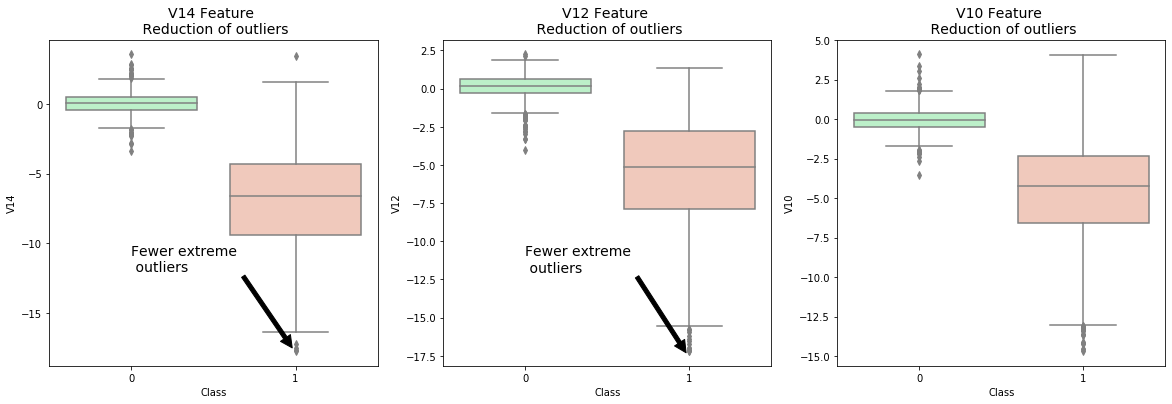

In [11]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

colors = ['#B3F9C5', '#f9c5b3']
# Boxplots with outliers removed
# Feature V14
sns.boxplot(x="Class", y="V14", data=new_df,ax=ax1, palette=colors)
ax1.set_title("V14 Feature \n Reduction of outliers", fontsize=14)
ax1.annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature 12
sns.boxplot(x="Class", y="V12", data=new_df, ax=ax2, palette=colors)
ax2.set_title("V12 Feature \n Reduction of outliers", fontsize=14)
ax2.annotate('Fewer extreme \n outliers', xy=(0.98, -17.3), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature V10
sns.boxplot(x="Class", y="V10", data=new_df, ax=ax3, palette=colors)
ax3.set_title("V10 Feature \n Reduction of outliers", fontsize=14)
ax3.annotate('Fewer extreme \n outliers', xy=(0.95, -16.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)


plt.show()

In [12]:
new_df.head()

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
240148,0.772544,-0.288010,-0.175745,1.085251,-1.095319,-0.829231,1.037689,0.073366,0.489721,0.471723,...,-0.098826,0.374164,1.126284,-0.192880,-0.390276,-0.647457,-0.198610,0.371321,0.244094,0
6899,-0.890686,-0.293460,-2.661802,5.856393,-7.653616,6.379742,-0.060712,-3.131550,-3.103570,1.778492,...,0.399097,0.734775,-0.435901,-0.384766,-0.286016,1.007934,0.413196,0.280284,0.303937,1
242555,0.785420,0.251537,-0.961138,0.817043,-0.181713,-0.908427,0.600183,-0.769392,0.710854,0.437037,...,0.061704,0.001172,-0.303796,0.002430,0.721613,-0.095276,-0.150134,0.183090,0.086975,0
6820,-0.893788,-0.293460,-2.169929,3.639654,-4.508498,2.730668,-2.122693,-2.341017,-4.235253,1.703538,...,0.500779,0.645103,-0.503529,-0.000523,0.071696,0.092007,0.308498,0.552591,0.298954,1
154697,0.210697,-0.201369,-4.221221,2.871121,-5.888716,6.890952,-3.404894,-1.154394,-7.739928,2.851363,...,-0.227882,1.620591,1.567947,-0.578007,-0.059045,-1.829169,-0.072429,0.136734,-0.599848,1


In [13]:
new_df.to_csv('outlier_removed_df.csv')

## Classification algorithms that we will be using:  

### Logistic Regression
### K Nearest Neighbours
### Linear Discriminant Analysis
### Classification Trees
### Support Vector Classifier
### Random Forest Classifier
### XGBoost Classifier   